In [1]:
import pandas as pd
pd.set_option("display.max_rows",45)
%matplotlib inline

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=4)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    label = [["\n True Positive", "\n False Negative \n Type II Error"],
             ["\n False Positive \n Type I Error", "\n True Negative"]
            ]
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, "{} {}".format(cm[i, j].round(4), label[i][j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot(pred_value):
    from sklearn.metrics import confusion_matrix
    cm_2labels = confusion_matrix(y_pred = pred_value, y_true = actual_value)
    plt.figure(figsize=[6,6])
    plot_confusion_matrix(cm_2labels, output_columns_2labels, normalize = True)

In [3]:
#kdd_diff_level_train = pd.read_pickle("dataset/kdd_diff_level_train.pkl")
kdd_diff_level_test = pd.read_pickle("dataset/kdd_diff_level_test.pkl")
actual_value = pd.read_pickle("dataset/kdd_test_2labels_y.pkl");
#output_columns_2labels = ['Normal','Attack']
output_columns_2labels = ['Attack','Normal']

In [4]:
def get_count(pred_value):
    difficulty = pd.DataFrame({"Actual":actual_value, "Predict":pred_value, "difficulty_level":kdd_diff_level_test})
    #difficulty = pd.concat(difficulty, pd.Data)
    difficulty['accuracy'] = None
    difficulty.ix[difficulty.Actual == difficulty.Predict, "accuracy"] = 'Correct'
    difficulty.ix[difficulty.Actual != difficulty.Predict, "accuracy"] = 'Incorrect'
    diff_group = difficulty.loc[:,["difficulty_level", "accuracy", "Predict"]].groupby(["difficulty_level", "accuracy"])
    total_correct = sum(difficulty.Actual == difficulty.Predict)
    total_records = difficulty.shape[0]
    total_incorrect = total_records - total_correct
    print("Total Records:{}".format(total_records))
    return diff_group.count()

In [5]:
dense_only_predictions = pd.read_pickle("dataset/dense_only_predictions.pkl")
dense_only_scores = pd.read_pickle("dataset/dense_only_scores.pkl")

In [6]:
dense_only_scores.sort_values("test_score", ascending=False)

,epoch,no_of_features,hidden_layers,train_score,test_score
18,5,32,50,0.952265,0.748004
8,5,8,50,0.977085,0.741040
23,5,64,50,0.960984,0.717575
13,5,16,50,0.941032,0.705021
2,5,4,6,0.461539,0.568577
12,5,16,6,0.599571,0.559927
7,5,8,6,0.495674,0.544402
1,5,4,4,0.558690,0.532825
14,5,16,100,0.535457,0.430758
29,5,128,100,0.534412,0.430758


Confusion matrix, without normalization
[[7469 5364]
 [ 312 9399]]


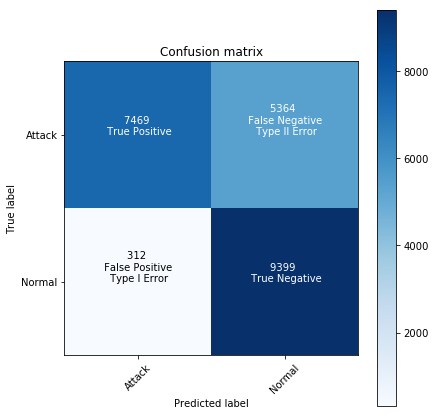

In [7]:
pred_value = dense_only_predictions.loc[:,"5_32_50"]
plot(pred_value)

In [8]:
#get_count(pred_value)
#dense_only_predictions

In [9]:
vae_dense_predictions = pd.read_pickle("dataset/vae_dense_predictions.pkl")
vae_dense_scores = pd.read_pickle("dataset/vae_dense_scores.pkl")

In [10]:
vae_dense_scores.sort_values("test_score", ascending=False)

,epoch,no_of_features,hidden_layers,train_score,test_score
20,1,32,6,0.743838,0.840711
16,1,2,6,0.875769,0.839647
7,1,256,2,0.846041,0.807488
19,1,16,6,0.889165,0.783002
23,1,256,6,0.888946,0.775994
15,1,256,4,0.836952,0.753194
2,1,8,2,0.907363,0.751996
6,1,128,2,0.877396,0.737713
1,1,4,2,0.926335,0.732656
14,1,128,4,0.814348,0.724760


Confusion matrix, without normalization
[[12336   497]
 [ 3094  6617]]


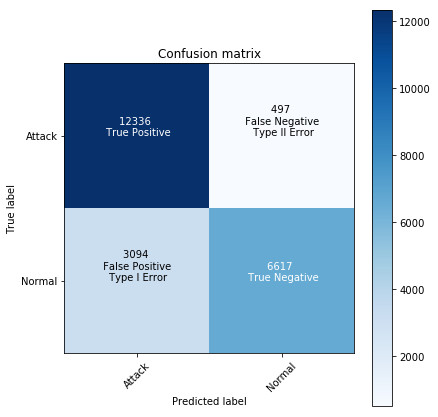

In [11]:
pred_value = vae_dense_predictions.loc[:,"1_32_6"]
plot(pred_value)

In [12]:
#get_count(pred_value)
#vae_dense_predictions

In [13]:
vae_only_predictions = pd.read_pickle("dataset/vae_only_predictions.pkl")
vae_only_scores = pd.read_pickle("dataset/vae_only_scores.pkl")

In [14]:
vae_only_scores.sort_values("test_score", ascending=True)

,epoch,no_of_features,hidden_layers,train_score,test_score
6,10,16,6,0.412746,0.993855
8,10,256,6,0.476456,1.242767
5,10,4,6,0.419856,1.268967
1,10,16,2,0.482189,1.271910
0,10,4,2,0.570674,1.305886
9,10,1024,6,0.558667,1.429459
10,10,4,10,0.674493,1.488091
14,10,1024,10,0.655482,1.534812
7,10,32,6,0.682100,1.549503
11,10,16,10,0.646160,1.565937


Normalized confusion matrix
[[ 0.7806  0.2194]
 [ 0.0483  0.9517]]


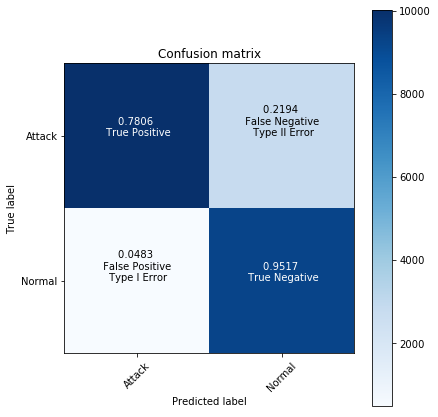

In [18]:
pred_value = vae_only_predictions["10_16_6"]
plot(pred_value)

In [16]:
#get_count(pred_value)
sum(pred_value == actual_value)/22544

0.85432931156848824